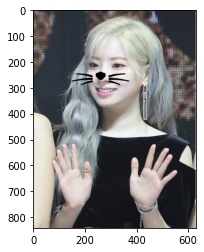

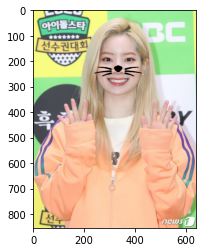

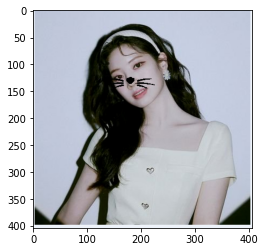

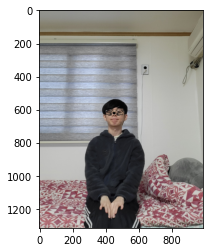

In [3]:
import os
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

def fs(image):
    my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/'+image
    img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
    img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #rgb 이미지로 변경
    plt.imshow(img_rgb)

#얼굴검출
    detector_hog = dlib.get_frontal_face_detector() # 얼굴의 bounding box 추출
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
    
        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)

#랜드마크 검출
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat' # 모델 불러오기
    landmark_predictor = dlib.shape_predictor(model_path)

    list_landmarks = []

# 얼굴 영역 박스의 face landmark를 찾아냅니다
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        # face landmark 좌표를 저장해둡니다
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)

#랜드마크를 검출한 이미지 출력
    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)

#스티커를 넣을 좌표확인
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[30][0]
        y = landmark[30][1]
        w = h = dlib_rect.width()
    
#스티커 이미지 생성
    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_whiskers.png'
    img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
    img_sticker = cv2.resize(img_sticker, (w,h)) #이미지 리사이즈

#x,y 좌표 위치 조정
    refined_x = x - w // 2
    refined_y = y - h // 2

#스티커의 범위 조정
    if refined_x < 0:
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0
    
#원본 이미지에 스티커를 적용 img_show[from:to] 형식
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

#최종 출력
    sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show() 
    
fs("right_face.png")
fs("front_face.png")
fs("angle_face.png")
fs("far_face.png")
